# VADER (Valence Aware Dictionary and sEntiment Reasoner) - Bag of words approach

In [1]:
# Kaggle API to pull dataset
import kagglehub
path = kagglehub.dataset_download("snap/amazon-fine-food-reviews")

print("Path to dataset files:", path)

Path to dataset files: /Users/ivanhung/.cache/kagglehub/datasets/snap/amazon-fine-food-reviews/versions/2


In [2]:
# Import appropriate libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for plots
plt.style.use('ggplot')

# This is the Natural Language Toolkit (a more traditional NLP library)
import nltk

In [3]:
# Load the dataset
import os
dataset_dir = "/Users/ivanhung/.cache/kagglehub/datasets/snap/amazon-fine-food-reviews/versions/2"

csv_file = os.path.join(dataset_dir, "Reviews.csv")
df = pd.read_csv(csv_file)

In [4]:
df.head(10) 

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [5]:
df['Text'].values[0]
# Here, we can see that this column is a text column which contains what the user wrote in their review. 
# We will be using this column for our NLP analysis.

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [6]:
# For times sake, we will limit the dataset to the first 500 rows
print(df.shape)
df = df.head(500)
print(df.shape)

(568454, 10)
(500, 10)


Small EDA on the Dataset

<Axes: title={'center': 'Count of Reviews by Star Rating'}, xlabel='Star', ylabel='Number of Reviews'>

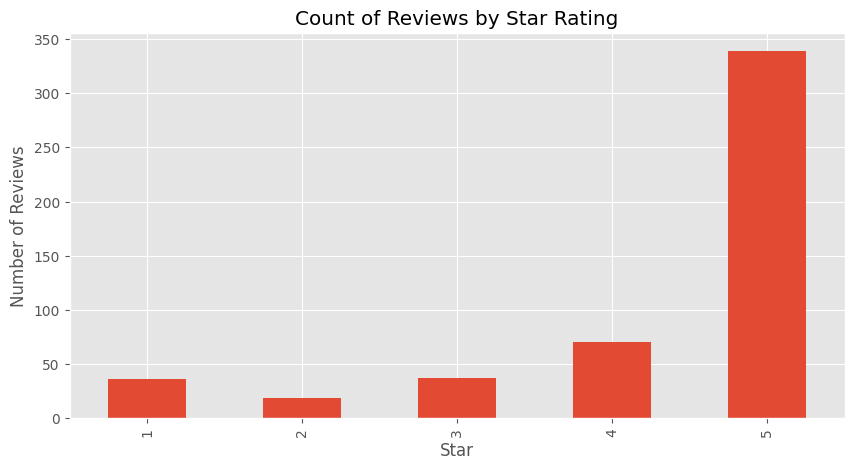

In [7]:
# Counting number of users who put 1 star, 2 star, etc.
df['Score'].value_counts().sort_index().plot(kind='bar', 
                                                title='Count of Reviews by Star Rating', 
                                                ylabel='Number of Reviews', 
                                                xlabel='Star',
                                                figsize=(10,5))

Basic NLTK Functions

1. nltk can tokenize our sentences

In [8]:
import ssl
import nltk

# Bypass SSL verification for NLTK downloads
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

# Download required NLTK data
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /Users/ivanhung/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/ivanhung/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [9]:
example = df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [10]:
# One feature that the NLTK library provides is tokenization
nltk.word_tokenize(example)

['This',
 'oatmeal',
 'is',
 'not',
 'good',
 '.',
 'Its',
 'mushy',
 ',',
 'soft',
 ',',
 'I',
 'do',
 "n't",
 'like',
 'it',
 '.',
 'Quaker',
 'Oats',
 'is',
 'the',
 'way',
 'to',
 'go',
 '.']

In [11]:
# We can assign this to a variable 'tokens'
tokens = nltk.word_tokenize(example)
tokens[:10] # First 10 tokens

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

2. nltk can find the type of speech for each word

In [12]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')

nltk.pos_tag(tokens)
# pos = part of speech tags - these are tags that computer uses to identify what type of word it is

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/ivanhung/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ'),
 (',', ','),
 ('I', 'PRP'),
 ('do', 'VBP'),
 ("n't", 'RB'),
 ('like', 'VB'),
 ('it', 'PRP'),
 ('.', '.'),
 ('Quaker', 'NNP'),
 ('Oats', 'NNPS'),
 ('is', 'VBZ'),
 ('the', 'DT'),
 ('way', 'NN'),
 ('to', 'TO'),
 ('go', 'VB'),
 ('.', '.')]

In [13]:
# We can create a variable called 'tagged' to represent the tagged tokens
tagged = nltk.pos_tag(tokens)
tagged[:10] # First 10 tagged tokens

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

3. nltk can put them into entities -> using 'chunk'. This takes the recommended name entity chunker to *chunk* the given list of tokens - takes the tokens and groups them into chunks of text.

In [14]:
nltk.download('maxent_ne_chunker_tab')

chunks = nltk.chunk.ne_chunk(tagged)
chunks.pprint()
# pprint = pretty print 

[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /Users/ivanhung/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!


(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


## VADER Sentiment Scoring <br>

We will use NLTK's ```SentimentIntensityAnalyzer``` to get the negative/netural/positive scores of the text. <br>

- This uses a 'bag of words' approach:
    1. Stops words are removed (e.g. and, the, this... words that are used to form the sentence)
    2. Each word is scored and combined to a total score
<br> 

*Note: this method does not account for the relationship between the words in the phrase (which is important in human speech), but it is a good starting point*

In [15]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm # progress bar for loops

nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ivanhung/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [16]:
sia.polarity_scores(example)
# A polarity score measures the positive, negative, or neutral emotional tone of a piece of text
# The compound score is a normalized score that ranges from -1 (most extreme negative) to +1 (most extreme positive).

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [17]:
# Run polarity score on our dataset above by using a for loop
# Create an empty dictionary to store results
results = {} 

# For loop with progress bar (using the tqdm library)
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    results[myid] = sia.polarity_scores(text)

"""
totle=len(df) gets the total number of rows we want to analyse to make a counter for the progress bar
i gets the index number of each row

row gets the actual row data as a pandas series

results[myid] sia.polarity_scores(text) gets the sentiment scores for the review text using VADER and stores 
the scores in a dictionary using the review ID as the key
"""

  0%|          | 0/500 [00:00<?, ?it/s]

'\ntotle=len(df) gets the total number of rows we want to analyse to make a counter for the progress bar\ni gets the index number of each row\n\nrow gets the actual row data as a pandas series\n\nresults[myid] sia.polarity_scores(text) gets the sentiment scores for the review text using VADER and stores \nthe scores in a dictionary using the review ID as the key\n'

In [18]:
results

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 

In [ ]:
# Making the dictionary into a pandas dataframe 
vaders = pd.DataFrame(results).transpose()

# Merge results found from Vaders method to original dataframe
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df) 

vaders

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,0.000,0.554,0.446,0.9725,B000G6RYNE,APGAA43E3WPN7,Darren,0,0,5,1201392000,amazing chips,i rarely eat chips but i saw these and tried t...
496,497,0.059,0.799,0.142,0.7833,B000G6RYNE,ABR7HU5H1KNE,Keith,0,0,5,1196726400,Best Chip Ever,This is easily the best potato chip that I hav...
497,498,0.025,0.762,0.212,0.9848,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...
498,499,0.041,0.904,0.055,0.1280,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,4,1184198400,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul..."


### Plotting VADER Results

/var/folders/40/t1_vxw5d4d75_bqs_k25gkhm0000gn/T/ipykernel_22899/1057934639.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.barplot(data=vaders, x='Score', y='compound', ci=95, color='blue')


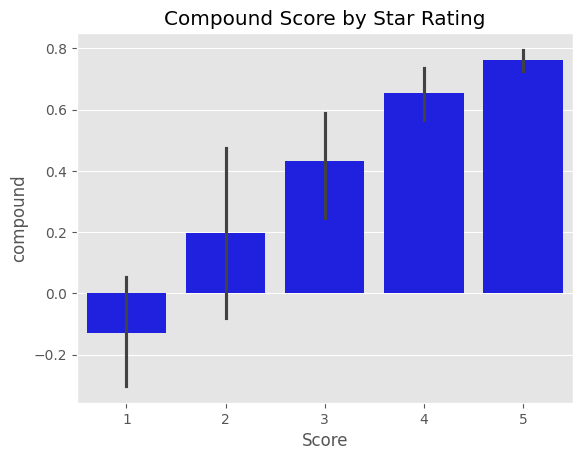

In [27]:
ax = sns.barplot(data=vaders, x='Score', y='compound', ci=95, color='blue')
ax.set_title('Compound Score by Star Rating')
plt.show()

Looking at the positive, neutral and negative scores for each

/var/folders/40/t1_vxw5d4d75_bqs_k25gkhm0000gn/T/ipykernel_22899/4017738661.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=vaders, x='Score', y='pos', ci=95, ax=axs[0])
/var/folders/40/t1_vxw5d4d75_bqs_k25gkhm0000gn/T/ipykernel_22899/4017738661.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=vaders, x='Score', y='neu', ci=95, ax=axs[1])
/var/folders/40/t1_vxw5d4d75_bqs_k25gkhm0000gn/T/ipykernel_22899/4017738661.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=vaders, x='Score', y='neg', ci=95, ax=axs[2])


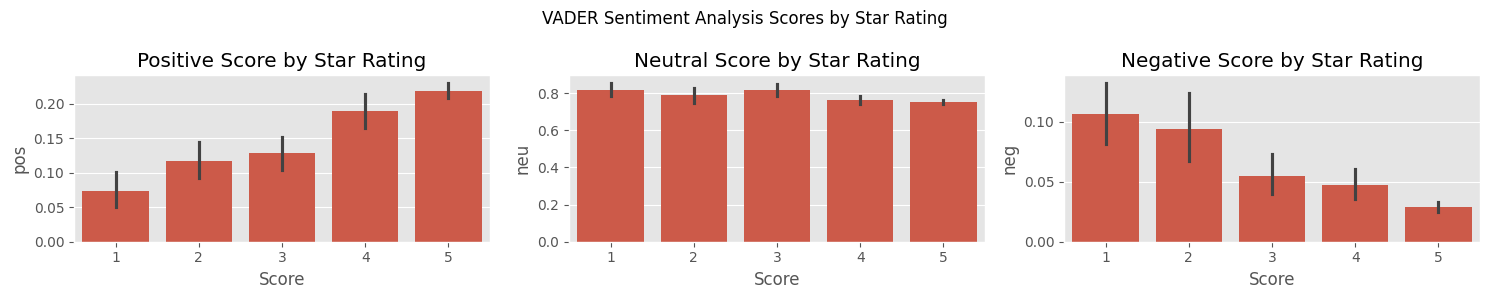

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 3))
sns.barplot(data=vaders, x='Score', y='pos', ci=95, ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ci=95, ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ci=95, ax=axs[2])

axs[0].set_title('Positive Score by Star Rating')
axs[1].set_title('Neutral Score by Star Rating')
axs[2].set_title('Negative Score by Star Rating')

fig.suptitle("VADER Sentiment Analysis Scores by Star Rating")
plt.tight_layout()

plt.show()

### Roberta Pretrained Model from Huggingface